In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("/content/drive/MyDrive/data/ML/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [19]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [20]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [12]:
# In my analysis, I do not consider street name, block and  flat model is relevant (town is sufficient for analysis, as no description of impact of the address, e.g., near MRT or not). Some information in flat model are either similar to room type (2 room, multi generation, etc.) or it reflected how old the unit is, which can be represented by lease commence date and remaining lease.Therefore. I will drop this column for my analysis



In [21]:
df = df.drop(['month','street_name','flat_model','lease_commence_date', 'block'], axis=1)

In [22]:
# Let's rename the column so it will be clearer
df = df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

In [23]:
df.head()

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,61 years 04 months,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,60 years 07 months,250000.0
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,62 years 05 months,262000.0
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,62 years 01 month,265000.0
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,62 years 05 months,265000.0


In [24]:
# I assume EXECUTIVE is equal to a 6 room (5 room + 1 study room). MULTI-GENERATION is equal to a 5 room (it served the same purpose).
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [25]:
# I assume that rather we use floor range, I the possible highest floor within the unit storey range.
df['storey'] = df['storey'].str[-2:].astype('int')

In [26]:
# I revise the format of the data in the remaining lease to be quantifiable (change to float).
df['remaining_lease'] = df['remaining_lease'].str.split(' ')
df['remaining_lease'] = df['remaining_lease'].apply(lambda x: (float(x[0])+(float(x[2])/12)) if (len(x)==4) else float(x[0]))
df.head()

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2,12,44.0,61.333333,232000.0
1,ANG MO KIO,3,3,67.0,60.583333,250000.0
2,ANG MO KIO,3,3,67.0,62.416667,262000.0
3,ANG MO KIO,3,6,68.0,62.083333,265000.0
4,ANG MO KIO,3,3,67.0,62.416667,265000.0


In [27]:
# Observe whether there is missing data or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166136 entries, 0 to 166135
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             166136 non-null  object 
 1   number_of_rooms  166136 non-null  int64  
 2   storey           166136 non-null  int64  
 3   floor_area_sqm   166136 non-null  float64
 4   remaining_lease  166136 non-null  float64
 5   resale_price     166136 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 7.6+ MB


In [28]:
df.isna().sum()

town               0
number_of_rooms    0
storey             0
floor_area_sqm     0
remaining_lease    0
resale_price       0
dtype: int64

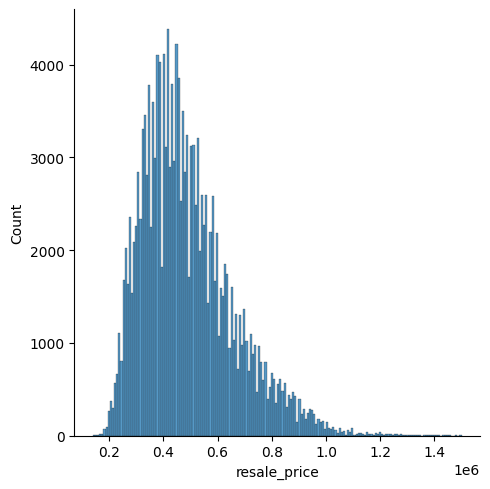

In [29]:
# First, we want to se ethe distribution of HDB resale price in Singapore
sns.displot(df['resale_price'])

In [30]:
# Let see the statistic information of the data
df.describe()

,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
count,166136.000000,166136.000000,166136.000000,166136.000000,1.661360e+05
mean,4.130959,9.767498,97.328158,74.698662,4.893296e+05
std,0.916996,5.948756,24.023964,13.829091,1.692610e+05
min,1.000000,3.000000,31.000000,42.250000,1.400000e+05
25%,3.000000,6.000000,82.000000,63.416667,3.650000e+05
50%,4.000000,9.000000,93.000000,74.666667,4.600000e+05
75%,5.000000,12.000000,112.000000,87.833333,5.800000e+05
max,6.000000,51.000000,249.000000,97.750000,1.500000e+06


<Axes: >

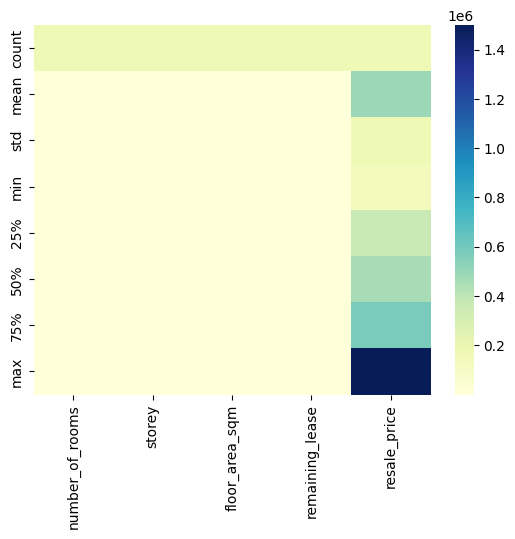

In [31]:
# Let us see the relation between each parameters
sns.heatmap(df.describe(), cmap="YlGnBu")

In [32]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [33]:
df = df.replace(dict.fromkeys(['SEMBAWANG','SENGKANG','WOODLANDS','YISHUN'], 'NORTH'))
df = df.replace(dict.fromkeys(['BUKIT MERAH','BUKIT TIMAH','QUEENSTOWN'], 'SOUTH'))
df = df.replace(dict.fromkeys(['BEDOK','GEYLANG','HOUGANG','KALLANG/WHAMPOA','PASIR RIS','PUNGGOL','SERANGOON','TAMPINES'], 'EAST'))
df = df.replace(dict.fromkeys(['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST'], 'WEST'))
df = df.replace(dict.fromkeys(['ANG MO KIO','CENTRAL AREA','BISHAN','MARINE PARADE','TOA PAYOH'], 'CENTRAL'))

In [34]:
# Let's check whether the data replacement was done properly
df['town'].unique()

array(['CENTRAL', 'EAST', 'WEST', 'SOUTH', 'NORTH'], dtype=object)

In [35]:
df = df.rename(columns={'town':'region'})

In [36]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [39]:
X[1,:]

array([1.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 67.0, 60.583333333333336],
      dtype=object)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
# Import neccessary library to evaluate the performance of each machine learning model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [42]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_ypred = mlr.predict(X_test)
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_acc

0.6614386640766388

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Let's determine the best degree for polynomial
for n in range(2,5):
    poly_reg = PolynomialFeatures(degree = n)
    X_poly = poly_reg.fit_transform(X_train)
    pr = LinearRegression()
    pr.fit(X_poly, y_train)
    poly_ypred = pr.predict(poly_reg.transform(X_test))
    poly_acc = r2_score(y_test,poly_ypred)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_ypred))
    print(r'The accuracy of polynomial regression with degree of {} is {}'.format(n,poly_acc))
    print(r'The RMSE of polynomial regression with degree of {} is {}'.format(n,poly_rmse))

The accuracy of polynomial regression with degree of 2 is 0.7295582426384427
The RMSE of polynomial regression with degree of 2 is 87944.64477427384
The accuracy of polynomial regression with degree of 3 is 0.743558363487381
The RMSE of polynomial regression with degree of 3 is 85638.05482714821
The accuracy of polynomial regression with degree of 4 is 0.7544301331045686
The RMSE of polynomial regression with degree of 4 is 83803.09568820919


In [44]:
from sklearn.linear_model import Ridge
ridge_r = Ridge()
ridge_r.fit(X_train, y_train)
ridge_ypred = ridge_r.predict(X_test)
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_acc

0.6614386298602533

In [45]:
from sklearn.linear_model import Lasso
lasso_r = Lasso(max_iter=100000)
lasso_r.fit(X_train, y_train)
lasso_ypred = lasso_r.predict(X_test)
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_acc

0.6614386909057548

In [46]:
from sklearn.linear_model import ElasticNet
EN_r = ElasticNet()
EN_r.fit(X_train, y_train)
EN_ypred = EN_r.predict(X_test)
EN_acc = r2_score(y_test,EN_ypred)
EN_acc

0.5688225968789762

In [47]:
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor()
tree_r.fit(X_train, y_train)
tree_ypred = tree_r.predict(X_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.7382061061406179

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor(n_estimators = 10)
forest_r.fit(X_train, y_train)
forest_ypred = forest_r.predict(X_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.8015366086822451

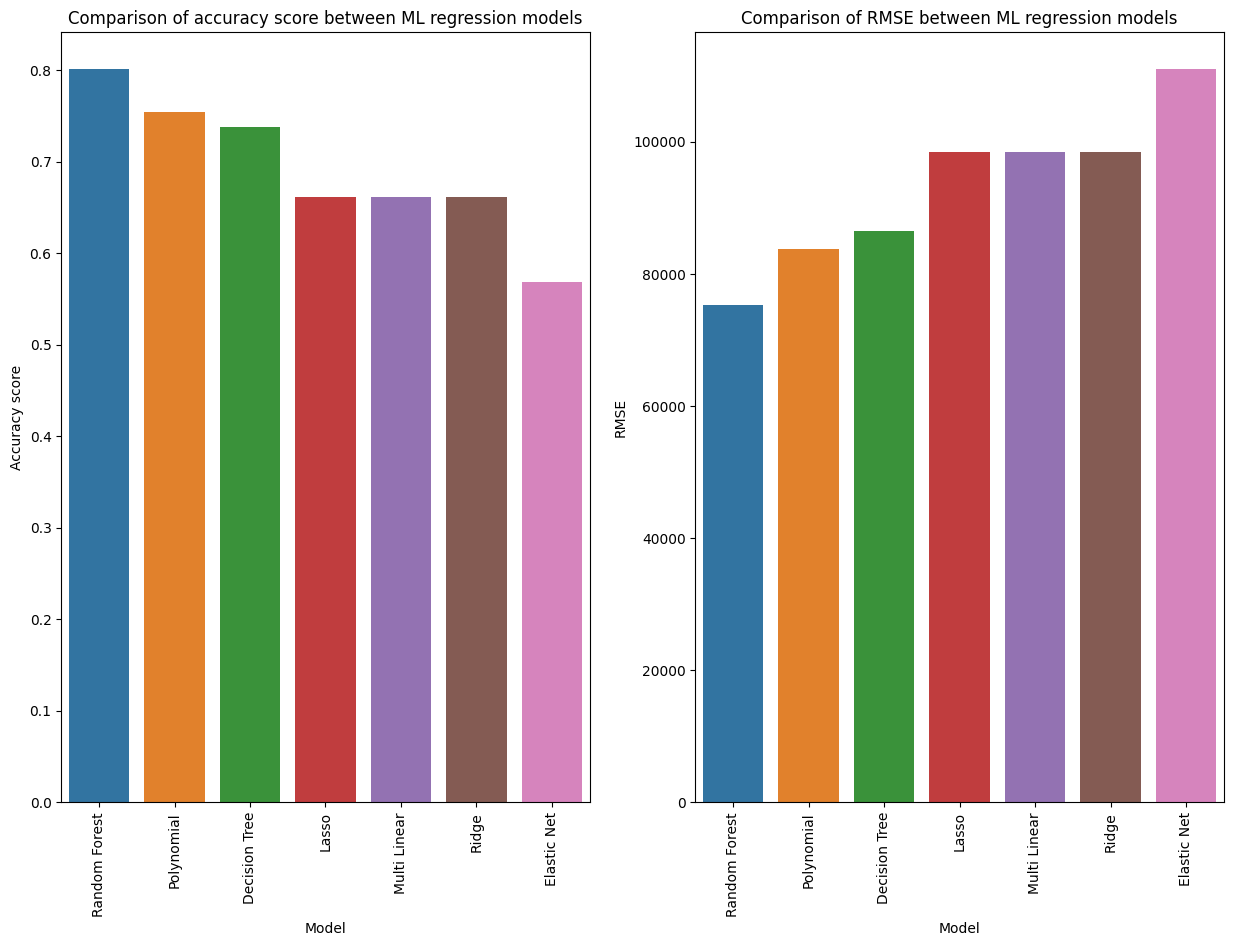

In [49]:
# Accuracy score for multi linear regression
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_rmse = np.sqrt(mean_squared_error(y_test,mlr_ypred))
# Evaluation for polynomial regression has been calculated in finding the best degree
# Evaluation for ridge regression
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_ypred))
# Evaluation for lasso regression
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_ypred))
# Evaluation for elastic net regression
EN_acc = r2_score(y_test,EN_ypred)
EN_rmse = np.sqrt(mean_squared_error(y_test,EN_ypred))
# Evaluation for decision trees regression
tree_acc = r2_score(y_test,tree_ypred)
tree_rmse = np.sqrt(mean_squared_error(y_test,tree_ypred))
# Evaluation for elastic random forest regression
forest_acc = r2_score(y_test,forest_ypred)
forest_rmse = np.sqrt(mean_squared_error(y_test,forest_ypred))
# Let's put it as a list and compare it in a bar chart
model_acc_score = [mlr_acc,poly_acc, ridge_acc, lasso_acc, EN_acc, tree_acc, forest_acc]
model_rmse = [mlr_rmse, poly_rmse, ridge_rmse, lasso_rmse, EN_rmse, tree_rmse, forest_rmse]
model_list = ['Multi Linear', 'Polynomial', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest']
model_result_df = pd.DataFrame(
    {'Model': model_list,
     'Accuracy score': model_acc_score,
     'RMSE': model_rmse
    })
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data=model_result_df, x='Model', y='Accuracy score', ax=ax1,order=model_result_df.sort_values('Accuracy score',ascending = False).Model).set_title("Comparison of accuracy score between ML regression models")
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.barplot(data=model_result_df, x='Model', y='RMSE', ax=ax2, order=model_result_df.sort_values('RMSE').Model).set_title("Comparison of RMSE between ML regression models")
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

In [50]:
# We know that after One Hot Encoding, the value of Central, East, North, South, and West is one at column 1,2,3,4, and 5, respectively (following alphabetical order).
area = ['Central','East','North','South','West']
pred_price_central = forest_r.predict([[1.0, 0.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_east = forest_r.predict([[0.0, 1.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_north = forest_r.predict([[0.0, 0.0, 1.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_south = forest_r.predict([[0.0, 0.0, 0.0, 1.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_west = forest_r.predict([[0.0, 0.0, 0.0, 0.0, 1.0, 4, 9, 95.0, 75]])[0]
resale_price = [pred_price_central,pred_price_east,pred_price_north,pred_price_south,pred_price_west]
predict_df = pd.DataFrame(list(zip(area, resale_price)),
              columns=['Area','Predicted HDB price (SGD)'])
predict_df.round()

,Area,Predicted HDB price (SGD)
0,Central,667900.0
1,East,686955.0
2,North,492000.0
3,South,795320.0
4,West,544200.0
